# Scikit-learn Demo: steps for building a ML Model

In scikit-learn we usually follow a fixed set of steps for building a machine learning model:

**1. Data preparation**

**2. Import the estimator object (model)**

**3. Create an instance of the estimator**

**4. Use the trainning data to train the estimator**

**5. Evaluate the model**

**6. Make predictions**

Of course these five-step recipe is just a general roadmap that may include several sub-steps, going back and forth between steps, and there are a lot of details that need to be considered in every step. However this is a nice mental model to have. 



## 1. Data Preparation

In [2]:
# Importing useful libraries
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import data
crime = pd.read_csv('./data/crime.csv', na_values='?', index_col='communityname') 

In [4]:
crime.head()

,state,county,community,fold,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,8,NaN,NaN,1,0.19,0.33,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.5,0.32,0.14,0.20
Tukwilacity,53,NaN,NaN,1,0.00,0.16,0.26,0.59,0.35,0.27,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,0.00,NaN,0.67
Aberdeentown,24,NaN,NaN,1,0.00,0.42,0.39,0.47,0.28,0.32,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,0.00,NaN,0.43
Willingborotownship,34,5.0,81440.0,1,0.04,0.77,0.51,0.50,0.34,0.21,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,0.00,NaN,0.12
Bethlehemtownship,42,95.0,6096.0,1,0.01,0.55,0.38,0.38,0.23,0.36,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,0.00,NaN,0.03


In [5]:
# number of rows
len(crime)

1994

In [7]:
# number of NaN values
nan = crime.isna().sum()
print(nan)

state                     0
county                 1174
community              1177
fold                      0
population                0
                       ... 
PolicOperBudg          1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 111, dtype: int64


In [8]:
nan[['householdsize', 'pctUrban', 'medIncome', 'PctKids2Par', 'PctIlleg', 'ViolentCrimesPerPop']]


householdsize          0
pctUrban               0
medIncome              0
PctKids2Par            0
PctIlleg               0
ViolentCrimesPerPop    0
dtype: int64

In [9]:
feature_names = ['householdsize', 'pctUrban', 'medIncome', 'PctKids2Par', 'PctIlleg']
target_name = 'ViolentCrimesPerPop'

In [11]:
# Getting the features and the target, sklearn can work directly with pandas dataframes
x = crime[feature_names]
y = crime[target_name]

In [101]:
x.head()

,householdsize,pctUrban,medIncome,PctKids2Par,PctIlleg
communityname,,,,,
Lakewoodcity,0.33,1.0,0.37,0.59,0.14
Tukwilacity,0.16,1.0,0.31,0.47,0.24
Aberdeentown,0.42,0.0,0.30,0.44,0.46
Willingborotownship,0.77,1.0,0.58,0.54,0.33
Bethlehemtownship,0.55,0.9,0.50,0.91,0.06


In [12]:
y.head()

communityname
Lakewoodcity           0.20
Tukwilacity            0.67
Aberdeentown           0.43
Willingborotownship    0.12
Bethlehemtownship      0.03
Name: ViolentCrimesPerPop, dtype: float64

### Split the data into: trainning and testing (cross-validation)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [15]:
len(y_train)
x_train.head()

,householdsize,pctUrban,medIncome,PctKids2Par,PctIlleg
communityname,,,,,
Montvilletownship,0.72,0.9,1.00,0.94,0.00
Aikencity,0.39,1.0,0.36,0.51,0.37
Andersoncity,0.33,1.0,0.19,0.41,0.38
Manassascity,0.59,1.0,0.58,0.76,0.23
Northfieldcity,0.92,0.0,0.31,0.76,0.25


### Now the data is ready let the modelling begin!

## 2. Import the estimator object (model)

In [16]:
from sklearn.linear_model import LinearRegression

## 3. Create an instance of the estimator

In [17]:
linear_regression_model = LinearRegression() # Pass any parameters 

## 4. Use the trainning data to train the estimator

In [18]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

## 5. Evaluate the model

In [23]:
from sklearn.metrics import mean_squared_error
# Get the predictions of the model for the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(x_test)
# All the metrics compare in some way how close are the predicted vs. the actual values
error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print('The Mean Square Error of this model is: ', error_metric)

The Mean Square Error of this model is:  0.021224915126021728


In [24]:
# Print coefficients and intercept for the multiple regression model
inter = linear_regression_model.intercept_
weights = linear_regression_model.coef_
print(f'The intercept of the trained model is {inter} and the weights are {weights}')

The intercept of the trained model is 0.4677131949689909 and the weights are [ 0.10684508  0.05452552  0.0870683  -0.66877774  0.26823755]


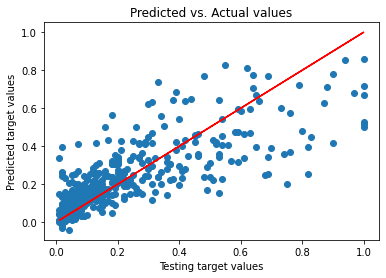

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values');

This is a plot of the true target *y_true* plotted against the predicted target, *y_pred*. Note that the red line is not the one-dimensional plot of the linear regression. It is the true y plotted against itself. This will always create a 45 degree straight line. We want all the scatter plots to be as close to this line as possible because this means y_pred = y_true

## 6. Make predictions

In [27]:
from collections import OrderedDict

In [39]:
new_data = OrderedDict([ 
    ('householdsize', 0.5),
    ('pctUrban', 0.6),
    ('medIncome', 0.1),
    ('PctKids2Par', 0.5),
    ('PctIlleg', 0.2)]
)
# .values.reshape(1, -1) because it must be 2-dim, because we passed only one new observation
new_data = pd.Series(new_data).values.reshape(1,-1) 
# Use the model to make predictions
linear_regression_model.predict(new_data)

C:\Users\hjalp\miniconda3\envs\JUP_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.28181652])

In [31]:
type(x_test)

pandas.core.frame.DataFrame

In [40]:
new_data = pd.Series(new_data).values.reshape(1,-1)

ValueError: Data must be 1-dimensional

In [ ]:
type(new_data)

In [33]:
new_data.shape

(1, 5)

In [34]:
x_test.shape 

(399, 5)

For a city with data such as the above, our model predicts a target value of 0.28181652